In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv("Toddler Autism dataset July 2018.csv")
data

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,1050,0,0,0,0,0,0,0,0,0,1,24,1,f,White European,no,yes,family member,No
1050,1051,0,0,1,1,1,0,1,0,1,0,12,5,m,black,yes,no,family member,Yes
1051,1052,1,0,1,1,1,1,1,1,1,1,18,9,m,middle eastern,yes,no,family member,Yes
1052,1053,1,0,0,0,0,0,0,1,0,1,19,3,m,White European,no,yes,family member,No


In [3]:
data.columns

Index(['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age_Mons', 'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who completed the test', 'Class/ASD Traits '],
      dtype='object')

In [4]:
data=data.drop("Case_No",axis=1)

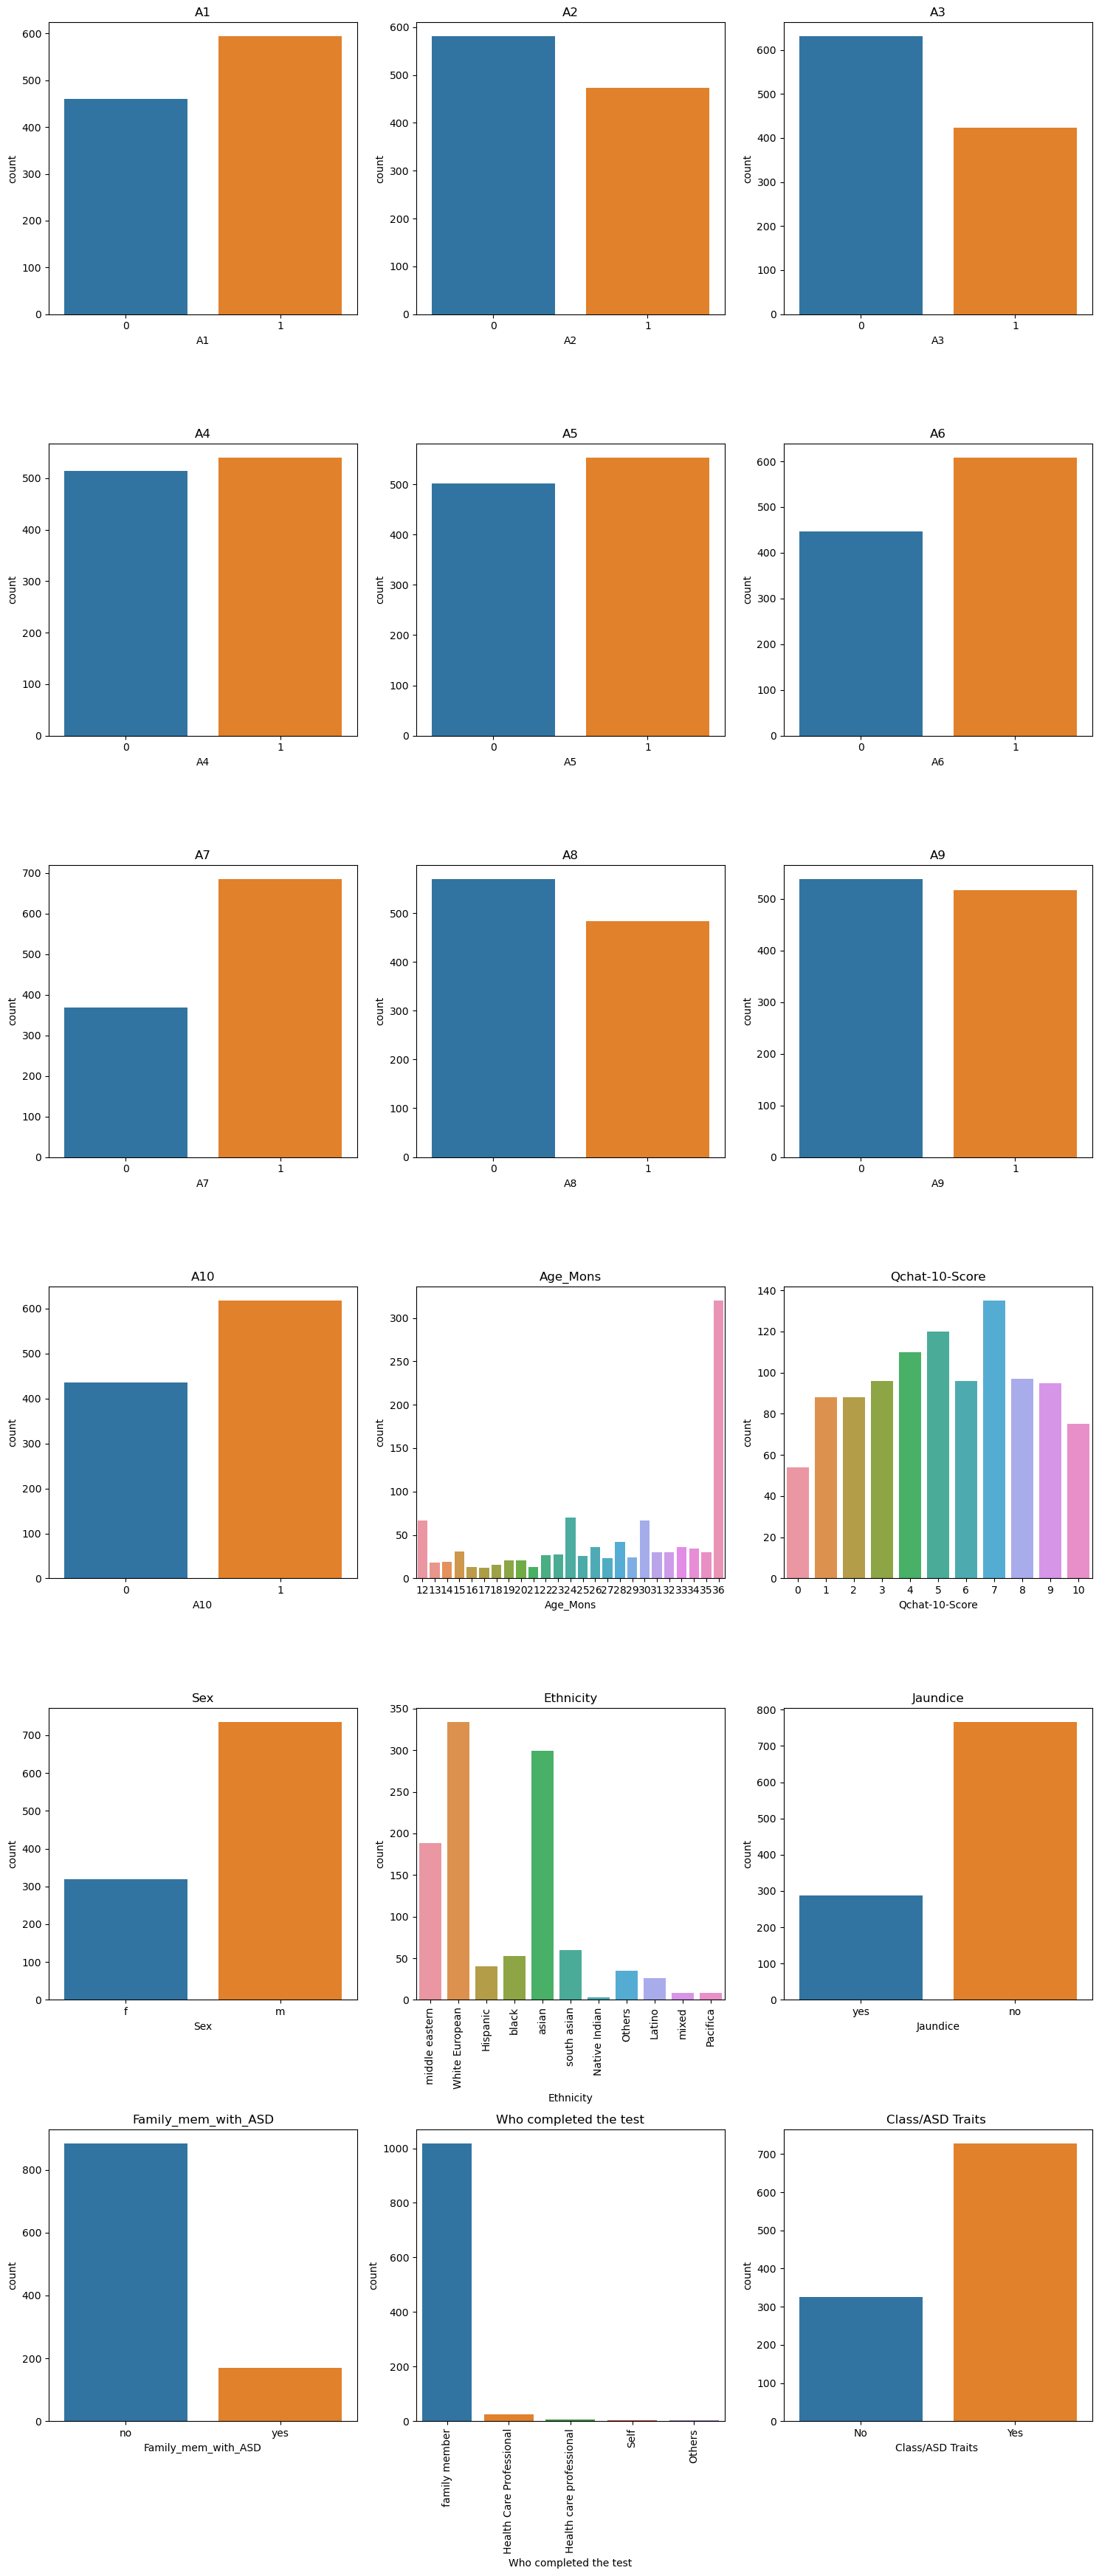

In [5]:
fig,axes=plt.subplots(6,3,figsize=(15,35))
axes=axes.ravel()
for i , col in enumerate(data.iloc[:,:]):
    sns.countplot(x=data[col],ax=axes[i])
    axes[i].set_title(col)
    if col == "Who completed the test" or col == "Ethnicity" or col == "Age Months":
        axes[i].tick_params(axis="x", labelrotation=90)
plt.tight_layout()
plt.show()

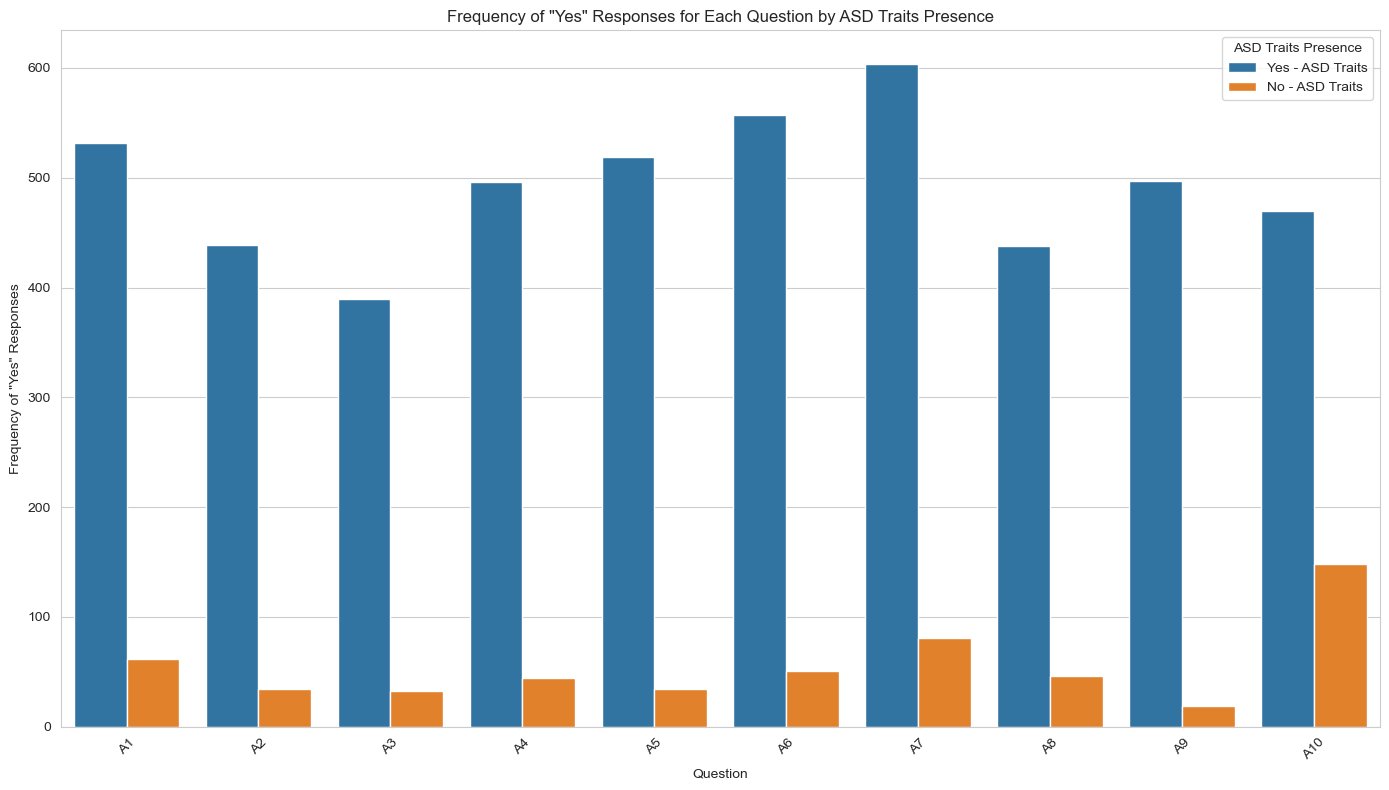

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Prepare the data for plotting
# Calculating the sum of "Yes" responses for each question in both ASD and non-ASD groups
as_yes_responses = data[data['Class/ASD Traits '] == 'Yes'][[f'A{i}' for i in range(1, 11)]].sum()
as_no_responses = data[data['Class/ASD Traits '] == 'No'][[f'A{i}' for i in range(1, 11)]].sum()

# Preparing the DataFrame for plotting
responses_df = pd.DataFrame({
    'Question': [f'A{i}' for i in range(1, 11)],
    'Yes - ASD Traits': as_yes_responses.values,
    'No - ASD Traits': as_no_responses.values
}).melt(id_vars="Question", var_name="ASD Traits Presence", value_name="Frequency")

# Plotting
plt.figure(figsize=(14, 8))
sns.barplot(x='Question', y='Frequency', hue='ASD Traits Presence', data=responses_df)
plt.title('Frequency of "Yes" Responses for Each Question by ASD Traits Presence')
plt.xlabel('Question')
plt.ylabel('Frequency of "Yes" Responses')
plt.legend(title='ASD Traits Presence', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


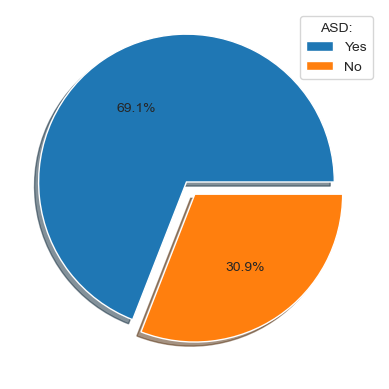

In [11]:
labels = ["Yes", "No"]
myexplode = [0.1, 0]
plt.pie(data.groupby('Class/ASD Traits ').size().reindex(labels),explode = myexplode, shadow = True,autopct='%1.1f%%')
plt.legend(title = "ASD:",labels = labels)
plt.show()